<a href="https://colab.research.google.com/github/chandank21/Electrical-Household-Load-Forecasting/blob/main/Load_Forecasting_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def load_data(file_dir):
    data = pd.read_csv(file_dir,sep=';',
                    header=0,low_memory=False,
                    infer_datetime_format=True,
                    parse_dates={'datetime':[0,1]},
                    index_col=['datetime'])
    return data
def clean_data(data):
  data.replace('?',np.NaN,inplace=True)
  data.fillna(method='bfill')
  data = data.astype('float32')

def series_to_supervised(df_as_np,n_lags,n_out):
  X,y = [],[]
  for i in range(len(df_as_np)-n_lags):
    row = [ a for a in df_as_np[i:i+n_lags]]
    X.append(row)
    label = df_as_np[i+n_lags:i+n_lags+n_out][0]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
dataset = load_data(r'/content/drive/MyDrive/datasets/household_power_consumption.txt')

In [ ]:
cols=['Global_active_power', 'Global_reactive_power', 'Global_intensity']
dataset= dataset[cols]
dataset = clean_data(dataset)
dataset = dataset.resample('H').mean()

In [ ]:
dataset.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [ ]:
#date_index=new_data.index.to_series()
#new_data['year']=date_index.dt.year
#new_data['month']=date_index.dt.month
#new_data['day_of_week']=date_index.dt.dayofweek
#new_data['hour']=date_index.dt.hour
#new_data = new_data.reset_index(drop=True)

#new_data['hour_cos'] = np.cos(2 * np.pi * new_data['hour'] / 24)
#new_data['hour_sin'] = np.sin(2 * np.pi * new_data['hour'] / 24)

#new_data['Global_active_power'] = 1000*new_data['Global_active_power']

#new_data.drop(labels=['hour'],axis=1,inplace=True)
#new_data.drop(labels=['Global_active_power'],axis=1,inplace=True)

In [ ]:
WINDOW_SIZE = 200


In [ ]:
X1.shape,y1.shape

((33968, 200, 5), (33968,))

In [ ]:
for i in range(3):
  mean = np.mean(X1[:,:,i])
  std = np.std(X1[:,:,i])
  X1[:,:,i] = X1[:,:,i]-mean / std

In [ ]:
train_input = X1[:23000]
test_input = X1[26000:]
validation_input = X1[23000:26000]
train_target = y1[:23000]
test_target = y1[26000:]
validation_target = y1[23000:26000]

In [ ]:
train_input.shape,test_input.shape,train_target.shape,test_target.shape

((23000, 200, 5), (7968, 200, 5), (23000,), (7968,))

# Models...

**model1..LSTM**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((200, 5)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0005), metrics=RootMeanSquaredError())

In [ ]:
model1.fit(train_input, train_target, validation_data=(validation_input, validation_target), epochs=10, callbacks=[cp1])

Epoch 1/10
719/719 [==============================] - ETA: 0s - loss: 512788.9688 - root_mean_squared_error: 716.0928

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


719/719 [==============================] - 75s 105ms/step - loss: 512788.9688 - root_mean_squared_error: 716.0928 - val_loss: 418728.9062 - val_root_mean_squared_error: 647.0927
Epoch 2/10
719/719 [==============================] - ETA: 0s - loss: 479301.8125 - root_mean_squared_error: 692.3163

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


719/719 [==============================] - 76s 105ms/step - loss: 479301.8125 - root_mean_squared_error: 692.3163 - val_loss: 403892.6875 - val_root_mean_squared_error: 635.5255
Epoch 3/10
719/719 [==============================] - ETA: 0s - loss: 460346.2812 - root_mean_squared_error: 678.4882

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


719/719 [==============================] - 77s 106ms/step - loss: 460346.2812 - root_mean_squared_error: 678.4882 - val_loss: 392374.5625 - val_root_mean_squared_error: 626.3981
Epoch 4/10
719/719 [==============================] - ETA: 0s - loss: 455567.0000 - root_mean_squared_error: 674.9570

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


719/719 [==============================] - 75s 104ms/step - loss: 455567.0000 - root_mean_squared_error: 674.9570 - val_loss: 392110.3438 - val_root_mean_squared_error: 626.1871
Epoch 5/10
719/719 [==============================] - ETA: 0s - loss: 445108.5312 - root_mean_squared_error: 667.1646

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


719/719 [==============================] - 75s 105ms/step - loss: 445108.5312 - root_mean_squared_error: 667.1646 - val_loss: 387940.2812 - val_root_mean_squared_error: 622.8485
Epoch 6/10
719/719 [==============================] - ETA: 0s - loss: 432805.0938 - root_mean_squared_error: 657.8792

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


719/719 [==============================] - 74s 103ms/step - loss: 432805.0938 - root_mean_squared_error: 657.8792 - val_loss: 376246.2812 - val_root_mean_squared_error: 613.3892
Epoch 7/10
719/719 [==============================] - ETA: 0s - loss: 423031.0938 - root_mean_squared_error: 650.4084

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


719/719 [==============================] - 75s 104ms/step - loss: 423031.0938 - root_mean_squared_error: 650.4084 - val_loss: 375604.8125 - val_root_mean_squared_error: 612.8661
Epoch 8/10
719/719 [==============================] - 70s 97ms/step - loss: 425216.0000 - root_mean_squared_error: 652.0859 - val_loss: 377300.2188 - val_root_mean_squared_error: 614.2477
Epoch 9/10
719/719 [==============================] - ETA: 0s - loss: 423777.4062 - root_mean_squared_error: 650.9819

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


719/719 [==============================] - 76s 105ms/step - loss: 423777.4062 - root_mean_squared_error: 650.9819 - val_loss: 373887.3750 - val_root_mean_squared_error: 611.4633
Epoch 10/10
719/719 [==============================] - ETA: 0s - loss: 419789.0312 - root_mean_squared_error: 647.9113

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


719/719 [==============================] - 74s 103ms/step - loss: 419789.0312 - root_mean_squared_error: 647.9113 - val_loss: 373034.7812 - val_root_mean_squared_error: 610.7657


In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predicted = model1.predict(train_input).flatten()
train_results = pd.DataFrame(data={'train_predicted':train_predicted, 'train_target':train_target.flatten()})

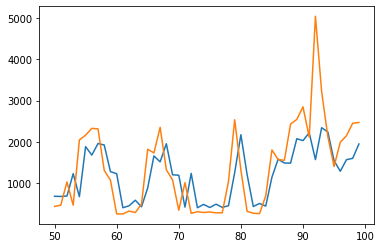

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['train_predicted'][50:100])
plt.plot(train_results['train_target'][50:100])

In [ ]:
test_predictions = model1.predict(test_input).flatten()
test_results = pd.DataFrame(data={'test_predictions':test_predictions, 'test_target':test_target.flatten(),'error':test_target.flatten()-test_predictions})
test_results

,test_predictions,test_target,error
0,1263.423340,2610.633301,1347.209961
1,2137.499512,2091.766602,-45.732910
2,1556.485840,1376.099976,-180.385864
3,1292.313599,1567.466675,275.153076
4,1481.938965,452.100006,-1029.838959
...,...,...,...
7963,1252.581055,1725.900024,473.318970
7964,1546.140991,1573.466675,27.325684
7965,1506.825195,1659.333374,152.508179
7966,1518.714355,1163.699951,-355.014404


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
mean_absolute_percentage_error(train_results.train_predicted,train_results.train_target)

0.4615891872988084

In [ ]:
mean_absolute_percentage_error(test_results.test_predictions,test_results.test_target)

0.4048405330614782

**MODEL2..Conv1D**

In [ ]:
model2 = Sequential()
model2.add(InputLayer((100, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

In [ ]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model2.fit(train_input, train_target, validation_data=(validation_input, validation_target), epochs=10, callbacks=[cp2])

In [ ]:
from tensorflow.keras.models import load_model
model2 = load_model('model2/')

In [ ]:
train_predicted = model2.predict(train_input).flatten()
train_results = pd.DataFrame(data={'train_predicted':train_predicted, 'train_target':train_target.flatten()})

In [ ]:
test_predictions = model2.predict(test_input).flatten()
test_results = pd.DataFrame(data={'test_predictions':test_predictions, 'test_target':test_target.flatten()})

In [ ]:
print(f"Test error...")
mean_absolute_percentage_error(test_results.test_predictions,test_results.test_target)

In [ ]:
print(f"Training Error....")
mean_absolute_percentage_error(train_results.train_predicted,train_results.train_target)

**Model3...GRU**

In [ ]:
model3 = Sequential()
model3.add(InputLayer((100, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

In [ ]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [ ]:
model3.fit(train_input, train_target, validation_data=(validation_input, validation_target), epochs=10, callbacks=[cp3])

In [ ]:
from tensorflow.keras.models import load_model
model3 = load_model('model3/')

In [ ]:
train_predicted = model2.predict(train_input).flatten()
train_results = pd.DataFrame(data={'train_predicted':train_predicted, 'train_target':train_target.flatten()})

test_predictions = model2.predict(test_input).flatten()
test_results = pd.DataFrame(data={'test_predictions':test_predictions, 'test_target':test_target.flatten()})

In [ ]:
print(f"Test error...")
mean_squared_error(test_results.test_predictions,test_results.test_target)

In [ ]:
print(f"Training Error....")
mean_squared_error(train_results.train_predicted,train_results.train_target)